## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import pathlib as Path
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = "{key}"
alpaca_secret_key = "{key}"

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 5 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [4]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-10-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-10-30", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["KO", "PG", "PEP", "AMZN", "AAPL"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.index = df_ticker.index.tz_localize(None)


# Display sample data
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-10-31 04:00:00,167.900,169.6499,166.94,169.04,36070445,199384,168.609022,AAPL
2017-11-01 04:00:00,169.870,169.9400,165.61,166.89,33638072,209941,167.188415,AAPL
2017-11-02 04:00:00,167.640,168.5000,165.28,168.11,41394328,249912,168.444532,AAPL
2017-11-03 04:00:00,174.000,174.2600,171.12,172.50,59402471,336014,172.719018,AAPL
2017-11-06 05:00:00,172.365,174.9900,171.72,174.25,35026850,194183,173.981439,AAPL
...,...,...,...,...,...,...,...,...
2022-10-24 04:00:00,129.490,130.4400,128.35,129.37,6927262,76258,129.363456,PG
2022-10-25 04:00:00,129.600,131.1800,128.47,130.86,6760473,74603,130.325679,PG
2022-10-26 04:00:00,130.650,132.5700,130.40,131.78,6595015,84962,131.820647,PG


In [5]:
# Reorganize the DataFrame
# GOOGLSeparate ticker data
KO = df_ticker[df_ticker['symbol']=='KO'].drop('symbol', axis=1)
PG = df_ticker[df_ticker['symbol']=='PG'].drop('symbol', axis=1)
PEP = df_ticker[df_ticker['symbol']=='PEP'].drop('symbol', axis=1)
AMZN = df_ticker[df_ticker['symbol']=='AMZN'].drop('symbol', axis=1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)

In [6]:
## Obtain bond data
# Read in the transaction_fraud_data.csv file into a PandasDataFrame.
BOND30 = pd.read_csv("../Resources/treasury_yield_30yr.csv")#, index_col='Date', infer_datetime_format=True, parse_dates=True)

BOND30 = BOND30.set_index('Date')

#BOND30 = BOND30.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Review the DataFrame
BOND30

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-31,2.878,2.886,2.870,2.875,2.875,0.0
2017-11-01,2.897,2.899,2.837,2.862,2.862,0.0
2017-11-02,2.848,2.856,2.822,2.829,2.829,0.0
2017-11-03,2.828,2.838,2.809,2.822,2.822,0.0
2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-10-25,4.320,4.334,4.225,4.263,4.263,0.0
2022-10-26,4.198,4.215,4.143,4.163,4.163,0.0
2022-10-27,4.179,4.190,4.060,4.092,4.092,0.0


In [7]:
# Concatenate the ticker DataFrames
df_ticker = pd.concat([KO, PG, PEP, AMZN, AAPL], axis=1, keys=["KO", "PG", "PEP", "AMZN", "AAPL"])

# Display sample data
df_ticker

KO                                                \
                      open    high      low  close    volume trade_count   
timestamp                                                                  
2017-10-31 04:00:00  45.92  46.170  45.8400  45.98   6560697       30961   
2017-11-01 04:00:00  45.75  46.090  45.6300  45.80   7067977       37951   
2017-11-02 04:00:00  45.81  45.950  45.7450  45.88   8317810       33114   
2017-11-03 04:00:00  45.97  46.155  45.9166  45.97   4730378       28057   
2017-11-06 05:00:00  45.91  45.920  45.4200  45.47   7451311       42387   
...                    ...     ...      ...    ...       ...         ...   
2022-10-24 04:00:00  56.64  57.730  56.5700  57.57  17363157      160974   
2022-10-25 04:00:00  59.04  59.110  57.7500  58.95  28802675      212134   
2022-10-26 04:00:00  59.01  59.780  58.8600  59.39  15773288      150931   
2022-10-27 04:00:00  59.77  59.840  59.3750  59.53  15967862      138121   
2022-10-28 04:00:00  59.57  60.910  59.4700  60.76  12826828      130719   

                                    PG                  ...       AMZN  \
                          vwap    open    high     low  ...     volume   
timestamp                                               ...              
2017-10-31 04:00:00  45.989033   86.49   86.50   85.72  ...    3476968   
2017-11-01 04:00:00  45.876989   86.33   87.14   86.11  ...    3755927   
2017-11-02 04:00:00  45.865392   86.78   87.04   86.23  ...    3684876   
2017-11-03 04:00:00  46.024980   86.78   87.16   86.46  ...    3752548   
2017-11-06 05:00:00  45.589961   86.55   86.64   86.03  ...    3381147   
...                        ...     ...     ...     ...  ...        ...   
2022-10-24 04:00:00  57.359941  129.49  130.44  128.35  ...   49522735   
2022-10-25 04:00:00  58.574332  129.60  131.18  128.47  ...   50954509   
2022-10-26 04:00:00  59.391433  130.65  132.57  130.40  ...   68942548   
2022-10-27 04:00:00  59.600030  132.00  133.12  131.50  ...  129653465   
2022-10-28 04:00:00  60.543877  133.17  135.51  132.92  ...  222666614   

                                                 AAPL                    \
                    trade_count         vwap     open      high     low   
timestamp                                                                 
2017-10-31 04:00:00       55945  1105.775876  167.900  169.6499  166.94   
2017-11-01 04:00:00       62863  1102.417730  169.870  169.9400  165.61   
2017-11-02 04:00:00       61153  1094.569939  167.640  168.5000  165.28   
2017-11-03 04:00:00       55799  1101.448691  174.000  174.2600  171.12   
2017-11-06 05:00:00       57479  1120.412429  172.365  174.9900  171.72   
...                         ...          ...      ...       ...     ...   
2022-10-24 04:00:00      492273   119.100718  147.185  150.2300  146.00   
2022-10-25 04:00:00      469717   120.172043  150.090  152.4900  149.36   
2022-10-26 04:00:00      644558   116.357401  150.960  151.9900  148.04   
2022-10-27 04:00:00     1337218   105.597291  148.070  149.0460  144.13   
2022-10-28 04:00:00     1862227   100.762260  148.200  157.5000  147.82   

                                                                
                      close     volume trade_count        vwap  
timestamp                                                       
2017-10-31 04:00:00  169.04   36070445      199384  168.609022  
2017-11-01 04:00:00  166.89   33638072      209941  167.188415  
2017-11-02 04:00:00  168.11   41394328      249912  168.444532  
2017-11-03 04:00:00  172.50   59402471      336014  172.719018  
2017-11-06 05:00:00  174.25   35026850      194183  173.981439  
...                     ...        ...         ...         ...  
2022-10-24 04:00:00  149.45   75968735      652872  148.374492  
2022-10-25 04:00:00  152.34   74782289      581422  151.435017  
2022-10-26 04:00:00  149.35   88834489      693414  150.040815  
2022-10-27 04:00:00  144.80  109198287      944054  145.311760  
2022-10-28 04:00:00  155.7

### The MCForecastTools Library at a Glance

In [8]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Simulate five year portfolio growth using Monte Carlo simulation

In [9]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.20,.20,.20,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [10]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

KO                                               \
                      open    high      low  close   volume trade_count   
timestamp                                                                 
2017-10-31 04:00:00  45.92  46.170  45.8400  45.98  6560697       30961   
2017-11-01 04:00:00  45.75  46.090  45.6300  45.80  7067977       37951   
2017-11-02 04:00:00  45.81  45.950  45.7450  45.88  8317810       33114   
2017-11-03 04:00:00  45.97  46.155  45.9166  45.97  4730378       28057   
2017-11-06 05:00:00  45.91  45.920  45.4200  45.47  7451311       42387   

                                                PG         ...         AMZN  \
                          vwap daily_return   open   high  ...         vwap   
timestamp                                                  ...                
2017-10-31 04:00:00  45.989033          NaN  86.49  86.50  ...  1105.775876   
2017-11-01 04:00:00  45.876989    -0.003915  86.33  87.14  ...  1102.417730   
2017-11-02 04:00:00  45.865392     0.001747  86.78  87.04  ...  1094.569939   
2017-11-03 04:00:00  46.024980     0.001962  86.78  87.16  ...  1101.448691   
2017-11-06 05:00:00  45.589961    -0.010877  86.55  86.64  ...  1120.412429   

                                     AAPL                                      \
                    daily_return     open      high     low   close    volume   
timestamp                                                                       
2017-10-31 04:00:00          NaN  167.900  169.6499  166.94  169.04  36070445   
2017-11-01 04:00:00    -0.001448  169.870  169.9400  165.61  166.89  33638072   
2017-11-02 04:00:00    -0.008571  167.640  168.5000  165.28  168.11  41394328   
2017-11-03 04:00:00     0.015883  174.000  174.2600  171.12  172.50  59402471   
2017-11-06 05:00:00     0.008150  172.365  174.9900  171.72  174.25  35026850   

                                                          
                    trade_count        vwap daily_return  
timestamp                                                 
2017-10-31 04:00:00      199384  168.609022          NaN  
2017-11-01 04:00:00      209941  167.188415    -0.012719  
2017-11-02 04:00:00      249912  168.444532     0.007310  
2017-11-03 04:00:00      336014  172.719018     0.026114  
2017-11-06 05:00:00      194183  173.981439     0.010145  

[5 rows x 40 columns]

In [11]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/warrendenetsosie/Desktop/FinTech/Project_Two/Financial Analysis Notebooks/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012233,0.978793,1.022799,0.992577,1.004358,1.002209,0.994342,0.999327,0.999440,0.993842,...,0.997793,1.000925,1.029228,1.005344,1.005070,0.998418,0.999707,1.009250,0.998130,0.987797
2,0.994994,0.970243,1.018006,0.989978,0.988957,1.021554,0.992093,0.998306,1.015613,0.990059,...,1.006201,0.984406,1.009117,0.999582,1.016025,1.010942,0.987663,1.015069,1.007240,0.990655
3,1.016843,0.967014,1.024668,0.973749,1.001843,1.037065,1.003859,1.022537,1.018277,0.994392,...,1.016645,0.995307,0.997695,0.999748,1.020564,0.999973,1.003697,1.017127,0.996157,0.994288
4,1.003504,0.953055,1.022183,0.978049,1.015362,1.040411,0.995602,1.021208,1.017758,0.988507,...,1.005658,0.999032,1.015254,1.004072,1.028987,0.995763,1.008915,1.004136,1.011124,0.994213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.589099,0.833271,0.973551,1.642806,1.398547,1.420423,2.511673,1.764006,4.055440,0.867037,...,1.519811,2.664958,2.072675,2.900644,1.824599,1.254575,1.559123,1.477416,1.561816,2.048364
1257,1.591815,0.833162,0.982962,1.641465,1.375930,1.403267,2.504318,1.784881,4.130167,0.882325,...,1.531859,2.670373,2.087836,2.912552,1.813620,1.252881,1.549280,1.467267,1.565010,2.084056
1258,1.606748,0.840755,0.975396,1.611560,1.395807,1.410201,2.491033,1.813346,4.104661,0.887898,...,1.548075,2.646781,2.112379,2.961562,1.806917,1.258560,1.543988,1.489311,1.562708,2.045167
1259,1.629423,0.841867,0.975094,1.597117,1.408591,1.392375,2.452421,1.811301,4.064637,0.886966,...,1.543313,2.665772,2.092221,3.006200,1.799742,1.277310,1.568662,1.496908,1.562786,2.054265


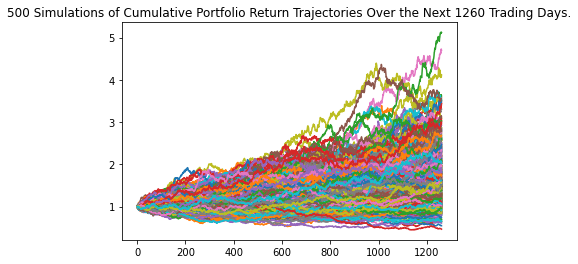

In [12]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot_conservative.png", bbox_inches="tight")

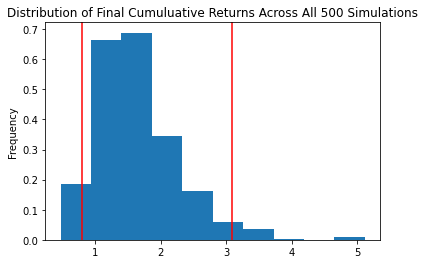

In [13]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot_conservative.png',bbox_inches='tight')

In [14]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.641596
std               0.623756
min               0.467642
25%               1.216879
50%               1.537199
75%               1.954276
max               5.118678
95% CI Lower      0.801685
95% CI Upper      3.085152
Name: 1260, dtype: float64


In [15]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $8016.85 and $30851.52
